In [1]:

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
#importing data
data_folder = './Tesco Grocery/'

Tesco_lsoa = pd.read_csv(data_folder + 'year_lsoa_grocery.csv')
lsoa_data_1 = pd.read_excel(data_folder + 'lsoa-data.xls','iadatasheet1',header=[0, 1, 2])
lsoa_data_2 = pd.read_excel(data_folder + 'lsoa-data.xls','iadatasheet2',header=[0, 1, 2])

#column's name
'''for col in lsoa_data_1.columns: 
    print(col) '''
    
#create a DataFrame with indicators
indicators=pd.DataFrame({
    'area_id':lsoa_data_2[('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'Codes')],
    'Unemployment Rate (%)':lsoa_data_2[('Economic Activity', 'Unemployment Rate', 2011)],
    'Mean Annual Household Income estimate (£)':lsoa_data_2[('Household Income, 2011/12', 'Mean Annual Household Income estimate (£)', 'Unnamed: 72_level_2')],
    'Median Annual Household Income estimate (£)':lsoa_data_2[('Household Income, 2011/12', 'Median Annual Household Income estimate (£)', 'Unnamed: 73_level_2')],
    'No Qualification(%)':lsoa_data_2[('Qualifications', '% No qualifications', 2011)],
    'High Qualification(%)':lsoa_data_2[('Qualifications', '% Highest level of qualification: Level 4 qualifications and above', 2011)]
})

indicators.head()

,area_id,Unemployment Rate (%),Mean Annual Household Income estimate (£),Median Annual Household Income estimate (£),No Qualification(%),High Qualification(%)
0,E01000907,9.874826,39985.100588,30222.708219,20.0,44.2
1,E01000908,8.043217,42393.697668,32049.045061,15.0,50.4
2,E01000909,4.853273,77369.830951,58468.946630,9.6,61.9
3,E01000912,8.844340,41737.141713,31551.206573,18.0,47.2
4,E01000913,2.076843,96648.892842,73024.451961,4.9,65.2


In [3]:
#merging datas
df = pd.merge(indicators,Tesco_lsoa,on='area_id')
df.head()

,area_id,Unemployment Rate (%),Mean Annual Household Income estimate (£),Median Annual Household Income estimate (£),No Qualification(%),High Qualification(%),weight,weight_perc2.5,weight_perc25,weight_perc50,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E01000907,9.874826,39985.100588,30222.708219,20.0,44.2,382.253521,39.0,170.0,300.0,...,5364,1548.0,748.0,800.0,380.0,985.0,183.0,37.177003,0.11,14440.0
1,E01000908,8.043217,42393.697668,32049.045061,15.0,50.4,337.678784,35.0,150.0,250.0,...,14960,1732.0,800.0,932.0,402.0,1059.0,271.0,39.207275,0.18,9897.0
2,E01000909,4.853273,77369.830951,58468.946630,9.6,61.9,326.405957,40.0,150.0,250.0,...,15098,1741.0,795.0,946.0,322.0,1064.0,355.0,42.018955,0.23,7616.0
3,E01000912,8.844340,41737.141713,31551.206573,18.0,47.2,361.636211,38.0,166.8,290.0,...,3960,1791.0,811.0,980.0,344.0,1203.0,244.0,38.209380,0.90,1999.0
4,E01000913,2.076843,96648.892842,73024.451961,4.9,65.2,326.822017,38.0,150.0,250.0,...,13821,1850.0,891.0,959.0,393.0,998.0,459.0,43.141081,1.62,1144.0


In [4]:
#Keep datas with representativness >0.1 
df_representativ = df.loc[(df['representativeness_norm'] > 0.1)]
non_representativ_areas=df.shape[0]-df_representativ.shape[0]
print(non_representativ_areas,'areas are not representative and non used in our study')

959 areas are not representative and non used in our study


                                    Indicators         R        p-value
0                        Unemployment Rate (%)  0.205718   2.723307e-38
1    Mean Annual Household Income estimate (£) -0.368650  5.321803e-125
2  Median Annual Household Income estimate (£) -0.343441  1.107500e-107
3                          No Qualification(%)  0.474782  4.629357e-217
4                        High Qualification(%) -0.578549   0.000000e+00
Series([], Name: Indicators, dtype: object) is not significative because its p-value is >0.05


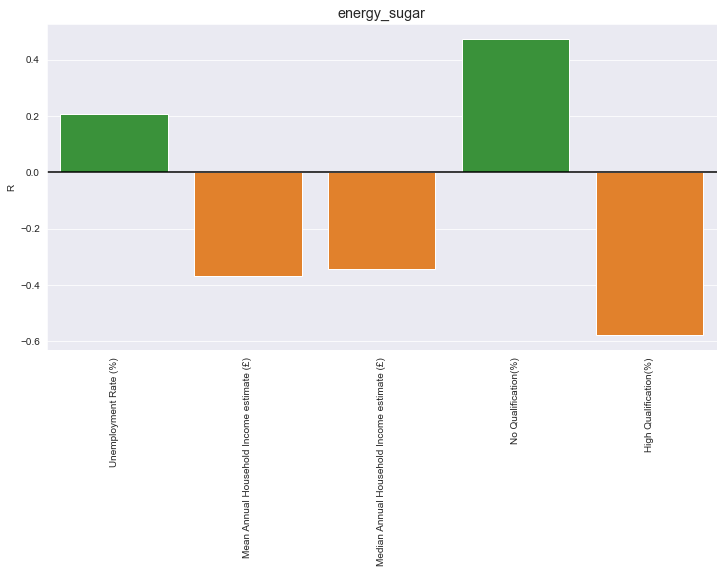

                                    Indicators         R       p-value
0                        Unemployment Rate (%)  0.109314  8.972604e-12
1    Mean Annual Household Income estimate (£) -0.168027  6.295815e-26
2  Median Annual Household Income estimate (£) -0.147189  3.306315e-20
3                          No Qualification(%)  0.209182  1.462192e-39
4                        High Qualification(%) -0.243913  1.404058e-53
Series([], Name: Indicators, dtype: object) is not significative because its p-value is >0.05


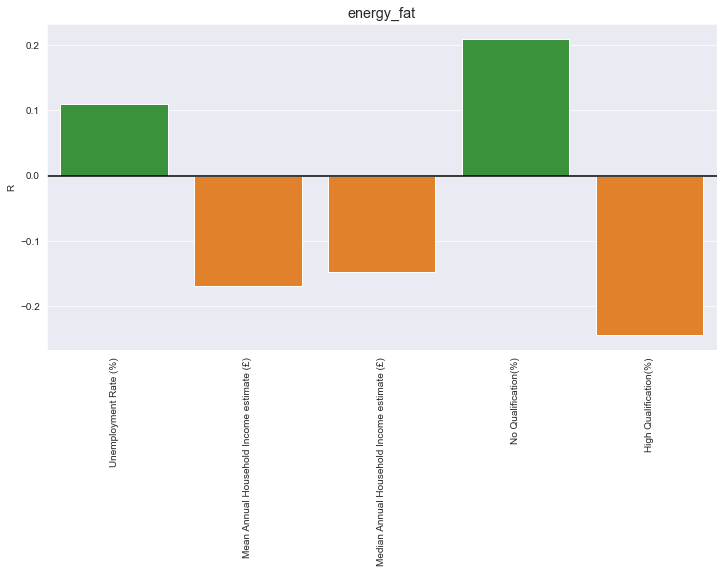

                                    Indicators         R        p-value
0                        Unemployment Rate (%) -0.316780   4.933831e-91
1    Mean Annual Household Income estimate (£)  0.370043  5.272720e-126
2  Median Annual Household Income estimate (£)  0.359355  1.974899e-118
3                          No Qualification(%) -0.370454  2.660984e-126
4                        High Qualification(%)  0.410238  3.586111e-157
Series([], Name: Indicators, dtype: object) is not significative because its p-value is >0.05


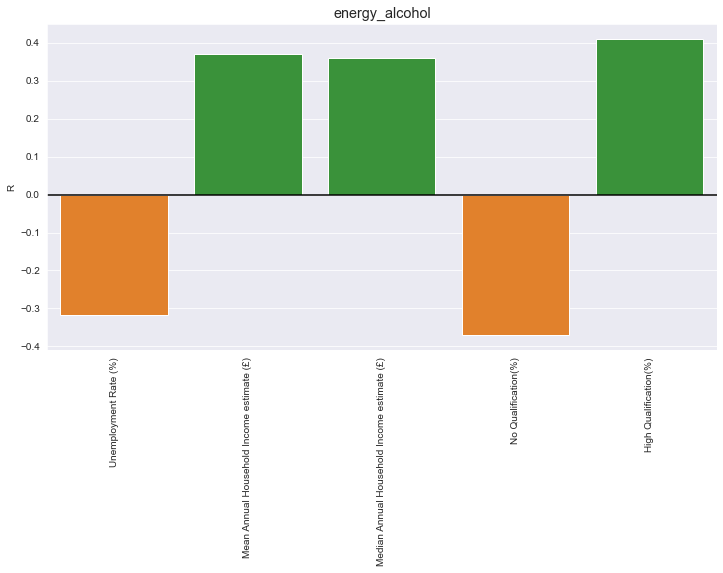

                                    Indicators         R       p-value
0                        Unemployment Rate (%)  0.000996  9.505928e-01
1    Mean Annual Household Income estimate (£) -0.049831  1.919227e-03
2  Median Annual Household Income estimate (£) -0.033816  3.531937e-02
3                          No Qualification(%)  0.116759  3.102874e-13
4                        High Qualification(%) -0.135475  2.485670e-17
0    Unemployment Rate (%)
Name: Indicators, dtype: object is not significative because its p-value is >0.05


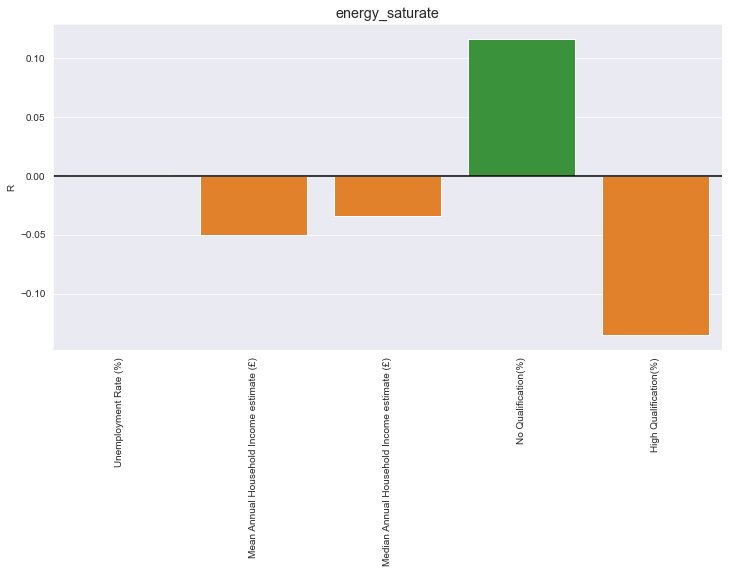

                                    Indicators         R        p-value
0                        Unemployment Rate (%)  0.365833  5.497112e-123
1    Mean Annual Household Income estimate (£) -0.522038  7.440612e-270
2  Median Annual Household Income estimate (£) -0.486191  4.665719e-229
3                          No Qualification(%)  0.624223   0.000000e+00
4                        High Qualification(%) -0.719190   0.000000e+00
Series([], Name: Indicators, dtype: object) is not significative because its p-value is >0.05


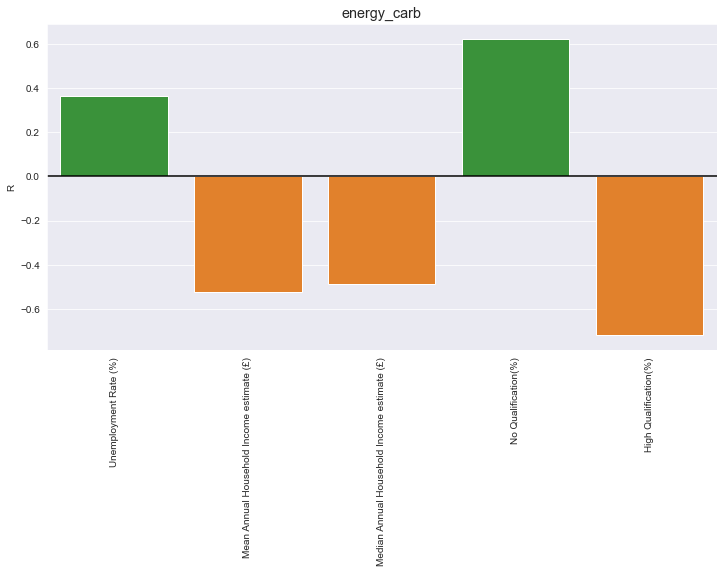

                                    Indicators         R        p-value
0                        Unemployment Rate (%)  0.276189   8.933015e-69
1    Mean Annual Household Income estimate (£) -0.403751  7.633288e-152
2  Median Annual Household Income estimate (£) -0.369990  5.759889e-126
3                          No Qualification(%)  0.509717  2.800118e-255
4                        High Qualification(%) -0.587942   0.000000e+00
Series([], Name: Indicators, dtype: object) is not significative because its p-value is >0.05


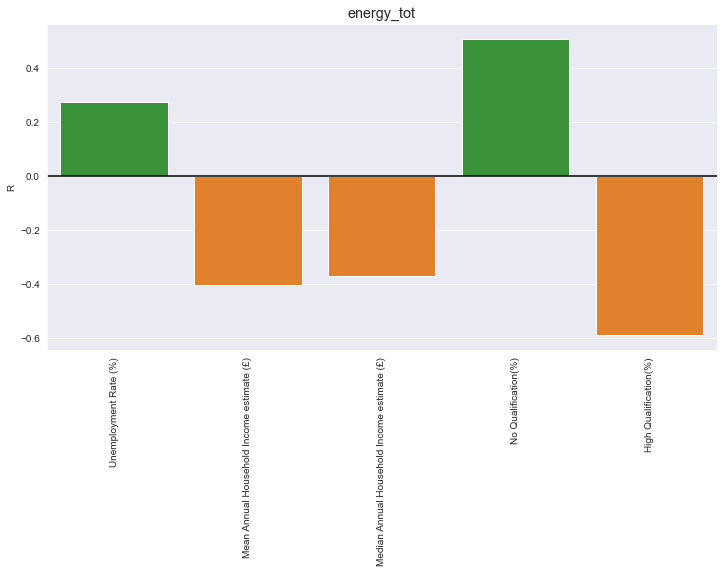

                                    Indicators         R       p-value
0                        Unemployment Rate (%) -0.199191  5.831704e-36
1    Mean Annual Household Income estimate (£)  0.269514  1.865940e-65
2  Median Annual Household Income estimate (£)  0.259808  8.541686e-61
3                          No Qualification(%) -0.181430  5.059316e-30
4                        High Qualification(%)  0.231213  3.526999e-48
Series([], Name: Indicators, dtype: object) is not significative because its p-value is >0.05


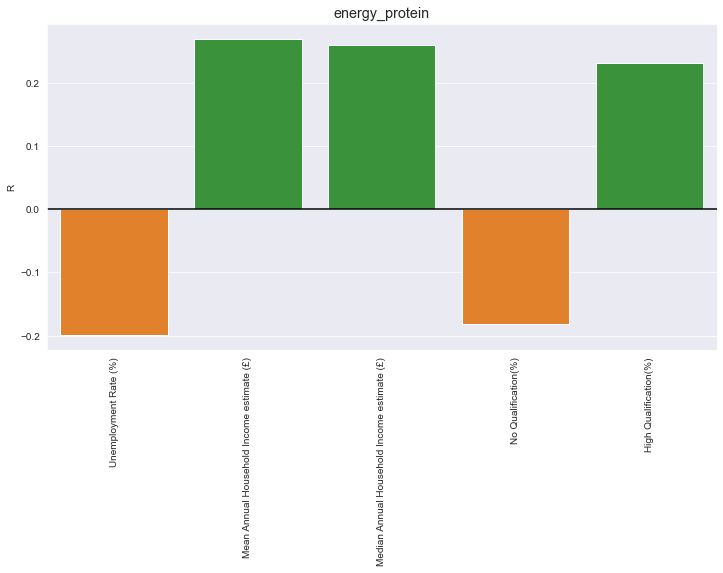

                                    Indicators         R        p-value
0                        Unemployment Rate (%) -0.566720   0.000000e+00
1    Mean Annual Household Income estimate (£)  0.598631   0.000000e+00
2  Median Annual Household Income estimate (£)  0.597298   0.000000e+00
3                          No Qualification(%) -0.482976  1.248653e-225
4                        High Qualification(%)  0.471636  7.842234e-214
Series([], Name: Indicators, dtype: object) is not significative because its p-value is >0.05


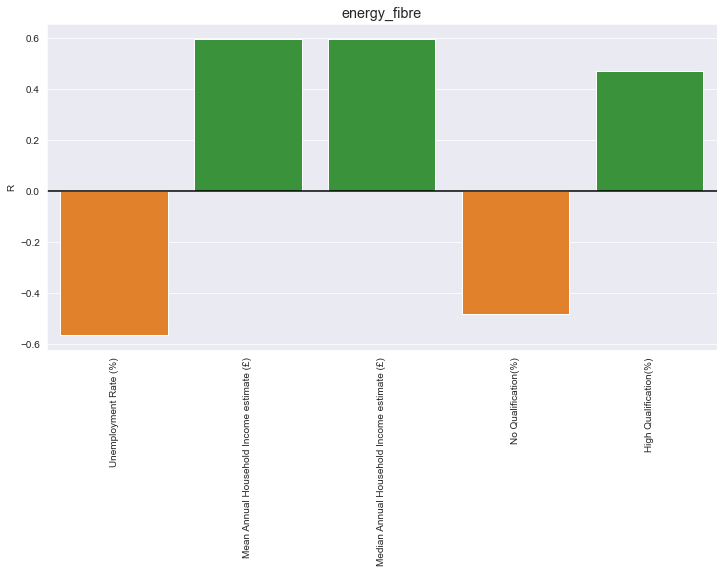

In [6]:
#computing spearman correlation for each indicator
id_indicators=['Unemployment Rate (%)','Mean Annual Household Income estimate (£)','Median Annual Household Income estimate (£)','No Qualification(%)','High Qualification(%)']
nutriments=['energy_sugar','energy_fat','energy_alcohol',"energy_saturate",'energy_carb','energy_tot','energy_protein','energy_fibre']
R=[]
P=[]




for j in nutriments:
    for i in id_indicators:
        r= stats.spearmanr(df_representativ[j],df_representativ[i],nan_policy='omit')[0]
        p= stats.spearmanr(df_representativ[j],df_representativ[i],nan_policy='omit')[1]
        R.append(r)
        P.append(p)
    
    #Create a data frame with the results
    results = pd.DataFrame({ 'Indicators':id_indicators,'R': R,'p-value':P})
    print(results)
    
    #showing indicators with non-significative p-value
    non_significativ=results.loc[(results['p-value'] > 0.05)]
    print(non_significativ.Indicators,'is not significative because its p-value is >0.05')
    plt.figure(figsize=(12,6))

    #plot for each nutrient correlation with indicators 
        #plot settings
    sns.set_style('darkgrid')
    green = sns.color_palette()[2]
    orange = sns.color_palette()[1]
    color = [green if R>0 else orange for R in results.R]
    
    plot = sns.barplot(data=results, x="Indicators",y="R",palette=color)
    plot.set_title(j,size='x-large')
    plot.axhline(y=0, linestyle='-',linewidth=1.5, color='black')
    plot.set_xlabel('')
    plot.set_xticklabels(results.Indicators,rotation=90)
    plt.show()
    
    R=[]
    P=[]

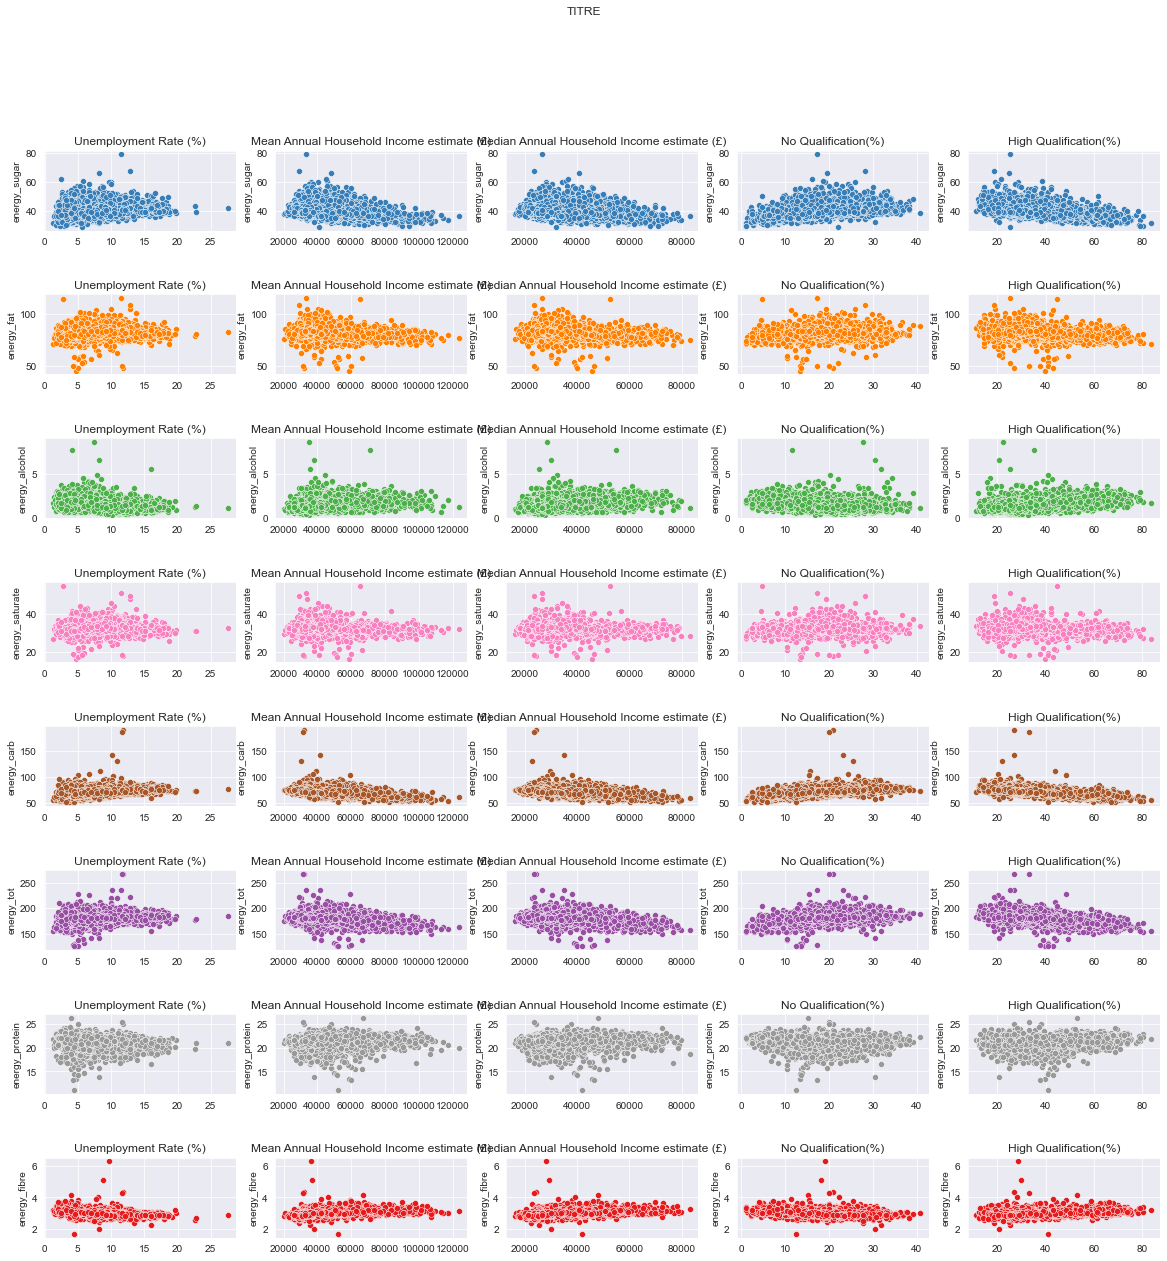

In [7]:
#creating plots to show correlations
fig, axs = plt.subplots(8, 5,figsize=(20,20))
plt.subplots_adjust(hspace = 0.8)

fig.suptitle('TITRE')
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c']

for j in nutriments:
    for i in id_indicators:
        plot=sns.scatterplot(ax=axs[nutriments.index(j),id_indicators.index(i)],x=i,y=j,data=df_representativ,color=CB_color_cycle[nutriments.index(j)])
        plot.set(xlabel=None)
        axs[nutriments.index(j),id_indicators.index(i)].set_title(i)
